In [2]:
import pandas as pd
import numpy as np
# Importing the libraries
from sklearn.model_selection import train_test_split # for data validation

# Models
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Metrics and Grid Search
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score, confusion_matrix, accuracy_score, classification_report, r2_score# Setting the default style of the plots


In [8]:
hapiness_df= pd.read_csv('Resources/hapiness_data.csv')
hapiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [4]:
#Check how many missing values there are in the dataset
hapiness_df.isnull().sum().sum()

579

In [5]:
# Drop null values
hapiness_df=hapiness_df.dropna()
hapiness_df= hapiness_df.reindex()

In [6]:
hapiness_df.shape

(1747, 12)

In [7]:
#Grouping the dataset by Country name and calculate the Mean
data_model = hapiness_df.groupby(by= 'Country name')['Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices',\
                        'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect','Confidence in national government'].mean().reset_index()
data_model

/var/folders/zq/rwx6mtq50yd_vfcnh_qt_z580000gn/T/ipykernel_11994/1730615624.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_model = hapiness_df.groupby(by= 'Country name')['Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices',\


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,3.594628,7.583020,0.508245,52.170833,0.518012,0.075328,0.843283,0.473482,0.326684,0.392547
1,Albania,4.898745,9.405987,0.698942,68.691365,0.714779,-0.044853,0.884626,0.555175,0.300746,0.407852
2,Angola,4.420299,8.989725,0.737973,52.150001,0.455957,-0.088896,0.867018,0.625734,0.351173,0.397389
3,Argentina,6.285048,10.031485,0.903041,66.628125,0.771455,-0.152174,0.840388,0.739983,0.287840,0.381224
4,Armenia,4.566087,9.285748,0.721515,65.573333,0.579216,-0.197553,0.837074,0.495732,0.437056,0.349403
...,...,...,...,...,...,...,...,...,...,...,...
144,Venezuela,6.042505,8.533054,0.914680,65.079231,0.657372,-0.096557,0.799767,0.787192,0.251597,0.386531
145,Vietnam,5.400847,8.556147,0.806390,64.540000,0.858053,0.016298,0.783006,0.583961,0.200419,0.836712
146,Yemen,3.899032,8.081041,0.702208,58.420625,0.627088,-0.134543,0.828157,0.465654,0.300970,0.420266
147,Zambia,4.453841,8.066699,0.729828,51.535000,0.761771,0.022134,0.828492,0.678728,0.297978,0.572063


In [189]:
#Creating the table model

# Creating the independent and depend variables
y = data_model['Life Ladder']
X = data_model[['Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices','Generosity' ,'Perceptions of corruption','Positive affect', 'Negative affect','Confidence in national government']]

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [190]:
y_test.count()

90

In [191]:
# Creating a predefined function to test the models
def modelfit(model):
   model.fit(X_train, y_train)
   preds = model.predict(X_test)
   mae = metrics.mean_absolute_error(y_test, preds)
   return (round(mae,4))

In [192]:

#Linear Regression
lm = LinearRegression(n_jobs = 10000)
model1=('Linear Regression', modelfit(lm))

# Random Forest Regressor
rf = RandomForestRegressor()
model2=('Random Forest Regressor', modelfit(rf))

# XGBoost
xg = XGBRegressor(learning_rate=0.1, n_estimators=5000)
model3=('XGBoost',modelfit(xg))

# Decision Tree
dt = DecisionTreeRegressor()
model4= ('Decision Tree', modelfit(dt))

# Bayesian Linear Model
br = BayesianRidge(n_iter=1000, tol = 0.5)
model5=('Bayesian Linear Model', modelfit(br))

#Create a DataFrame with Models
models = pd.DataFrame(data= [model1, model2, model3, model4, model5], columns=['Model', 'MAE'])
models
# mmodels.style.apply(highlight_cell, )

,Model,MAE
0,Linear Regression,0.3906
1,Random Forest Regressor,0.3783
2,XGBoost,0.3874
3,Decision Tree,0.5198
4,Bayesian Linear Model,0.4194


In [202]:
xg_reg_model = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1, n_estimators=5000)
xg_reg_model.fit(X_train, y_train)
xg_predictions = xg_reg_model.predict(X_test)
xg_predictions

[22:17:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


array([5.262018 , 5.4608755, 6.0133257, 4.163924 , 3.915171 , 4.8255253,
       5.9982886, 3.9846919, 6.8619604, 4.849948 , 6.9992366, 5.345094 ,
       4.075257 , 5.3883066, 7.456012 , 6.779226 , 5.3529716, 4.7769494,
       4.7351604, 7.1164837, 6.78809  , 6.0909624, 6.5795765, 6.6198993,
       5.7921634, 4.035946 , 5.8300586, 4.4551444, 5.332234 , 5.4235635,
       5.8538313, 7.110623 , 5.3307858, 4.895803 , 4.0929756, 5.4917903,
       6.181309 , 5.6505475, 5.3609166, 5.4556804, 5.1753197, 4.7559376,
       5.5678   , 5.631397 , 4.863908 , 6.6557913, 6.1342063, 4.8108096,
       4.3620067, 4.1734624, 4.677459 , 4.072746 , 6.6662555, 7.2318926,
       4.0388117, 6.80899  , 4.6861076, 5.6457453, 4.070741 , 5.3476524,
       3.7105572, 4.9170294, 7.1302733, 6.6848335, 7.3285007, 6.759253 ,
       5.413713 , 6.0446796, 6.70063  , 4.4127383, 4.062571 , 6.465551 ,
       4.8414607, 4.8459587, 4.9598327, 5.8157754, 4.7361107, 6.0227637,
       4.570067 , 6.814828 , 6.2832904, 5.912626 , 

In [203]:
r2_score(y_test, xg_predictions)

0.7928957647069097

In [204]:
# Create a random forest regresor.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 
rf_model = rf_model.fit(X_train, y_train)
rf_predictions= rf_model.predict(X_test)
rf_predictions

array([5.24339532, 5.22115167, 5.82301676, 4.50335405, 4.16570305,
       4.67768635, 5.56302996, 4.18622058, 7.01520208, 4.7821355 ,
       6.99405451, 5.29720026, 4.18685016, 5.2562597 , 7.12793378,
       6.21760345, 5.31306281, 4.75284224, 4.76048971, 7.02421015,
       6.70869939, 6.01395375, 6.4692332 , 6.31652859, 5.96567863,
       4.11109183, 5.68445745, 4.81161454, 5.41482535, 5.30500049,
       5.6316678 , 6.94334947, 5.18157767, 4.81080868, 4.20061303,
       4.94059947, 6.0862235 , 5.57674178, 5.42009015, 5.19388478,
       5.53502683, 4.77176941, 5.60765356, 5.58866989, 4.75688841,
       6.78233653, 5.71008884, 4.77124838, 4.30662296, 4.2475578 ,
       4.8359778 , 4.04351933, 6.63905638, 6.91982763, 4.0731257 ,
       6.55773674, 4.80851352, 5.76807824, 4.23090092, 5.19092772,
       4.05776509, 4.81363655, 7.02470612, 6.37854647, 7.09973475,
       6.94568077, 5.38386142, 6.02390924, 6.47789114, 4.34081595,
       4.10404161, 5.6848231 , 4.79393805, 4.84663585, 4.72536

In [205]:
r2_score(y_test, rf_predictions)

0.810495830809052

### Correlation Matrix

/var/folders/zq/rwx6mtq50yd_vfcnh_qt_z580000gn/T/ipykernel_79011/2793263386.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'year'),
  Text(0, 1.5, 'Life Ladder'),
  Text(0, 2.5, 'Log GDP per capita'),
  Text(0, 3.5, 'Social support'),
  Text(0, 4.5, 'Healthy life expectancy at birth'),
  Text(0, 5.5, 'Freedom to make life choices'),
  Text(0, 6.5, 'Generosity'),
  Text(0, 7.5, 'Perceptions of corruption'),
  Text(0, 8.5, 'Positive affect'),
  Text(0, 9.5, 'Negative affect'),
  Text(0, 10.5, 'Confidence in national government')])

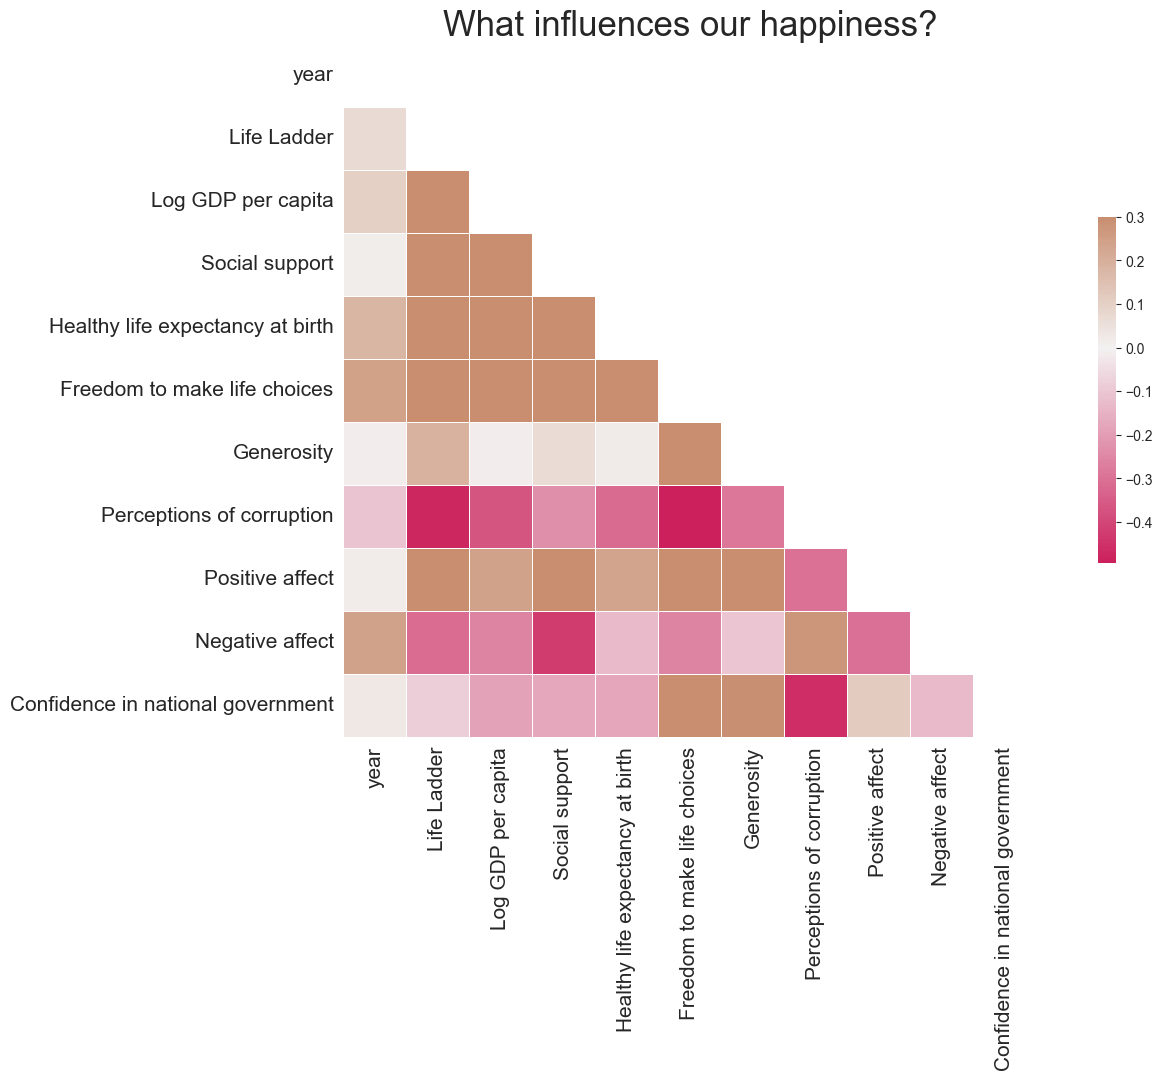

In [11]:
# Computing the Correlation Matrix

sns.set_style('whitegrid')
sns.set_palette('Set2')
corr = hapiness_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('What influences our happiness?', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [ ]:
# Calculating the Pearson Correlation

c1 = scipy.stats.pearsonr(hapiness_df['Score'], hapiness_df['GDP per capita'])


print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))